In [79]:
using LinearAlgebra, Plots, Statistics
include("../src/hamiltonian.jl")
include("../src/agr.jl")
t   = 0.5 # hopping
E   = 2   # on-site energy
disorder_number = 10
# disorder_step = 0.1
size_number = 10
size_step = 10
disorder_realization = 300
disorders = 10 .^ LinRange(-2, 1, disorder_number)
agrs = Array{Float64, 2}(undef, size_number, disorder_number)
for i in 1:size_number
    size = 10+i*size_step
    for j in 1:disorder_number
        disorder = disorders[j]
        agr_realization = 0
        k=1
        while k <= disorder_realization
            ham = simple_hamiltonian(size, t, disorder, E)
            evals_list = eigvals(ham)
            agr_realization += agr(evals_list)
            k+=1
        end
        agrs[i,j] = agr_realization/disorder_realization
    end
end

LoadError: InterruptException:

In [92]:

plot(disorders, transpose(agrs), xaxis=:log10)

LoadError: Expects 30 elements in each col of y, found 1.

In [106]:
using LinearAlgebra, Plots, Statistics
include("../src/hamiltonian.jl")
include("../src/agr.jl")
t   = 0.5 # hopping
E   = 2   # on-site energy
size_number = 30
disorder_realization = 300
agrs = Array{Float64, 1}(undef, size_number)
for j in 1:size_number
    size = 10+10*j
    agr_realization = 0
    k=1
    while k <= disorder_realization
        ham = simple_hamiltonian(size, t, 0.001, E)
        evals_list = eigvals(ham)
        agr_realization += agr(evals_list)
        k+=1
    end
    agrs[j] = agr_realization / disorder_realization
end


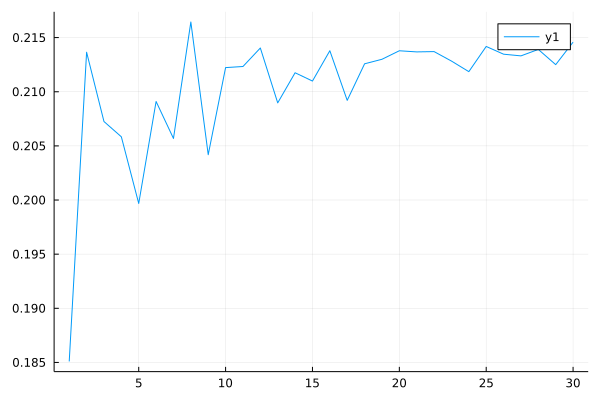

In [107]:
plot(agrs)